## Segmentación de imágenes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
brain_df = pd.read_csv('Brain_MRI/data_mask.csv')

In [3]:
brain_df.head()

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0


In [4]:
# Ok, la ruta de la imagen para el paciente nº1
brain_df.image_path[1]

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

In [5]:
brain_df.mask_path[1]

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [6]:
#¿Lo tenemos balanceado?
#¿Cuantas muestras tenemos de "paciente sano"?
brain_df['mask'].value_counts()

mask
0    2556
1    1373
Name: count, dtype: int64

In [7]:
#Vamos a hacer un gráfico interactivo de cuantos hay en el 0, 1
import plotly.graph_objects as go

#Vamos a representar los ejes
x = brain_df['mask'].value_counts().index
y = brain_df['mask'].value_counts()

In [8]:
fig =go.Figure([go.Bar(x=x,y=y)])
fig.show()


In [9]:
# fig =go.Figure([go.Bar(x=x,y=y)])
# fig.show(renderer="browser")


Pues vamos a dibujar nuestras primeras imágenes la imagen 83

In [10]:
%cd Brain_MRI

d:\IA-Github\IA\Programacion_de_Inteligencia_Artificial\UD4\Healthcare\Healthcare_AI_Datasets\Brain_MRI


In [11]:
brain_df.image_path[83]

'TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_1.tif'

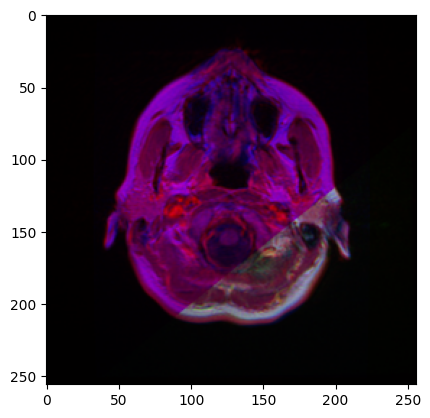

In [12]:
import cv2
plt.imshow(cv2.imread(brain_df.image_path[83]))

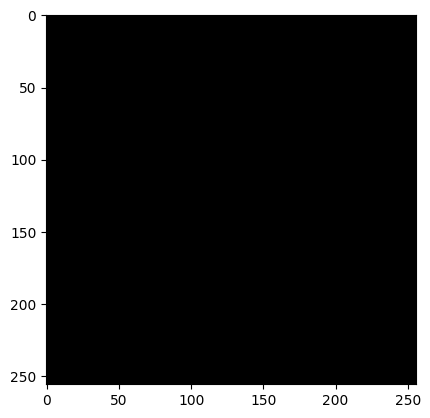

In [13]:
plt.imshow(cv2.imread(brain_df.mask_path[83]))

### Visualización básica
Visualizaremos imágenes (MRI y Máscaras) en el dataset de forma separada 6 x 2



C:\Users\Adri\AppData\Local\Temp\ipykernel_14236\1583130453.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



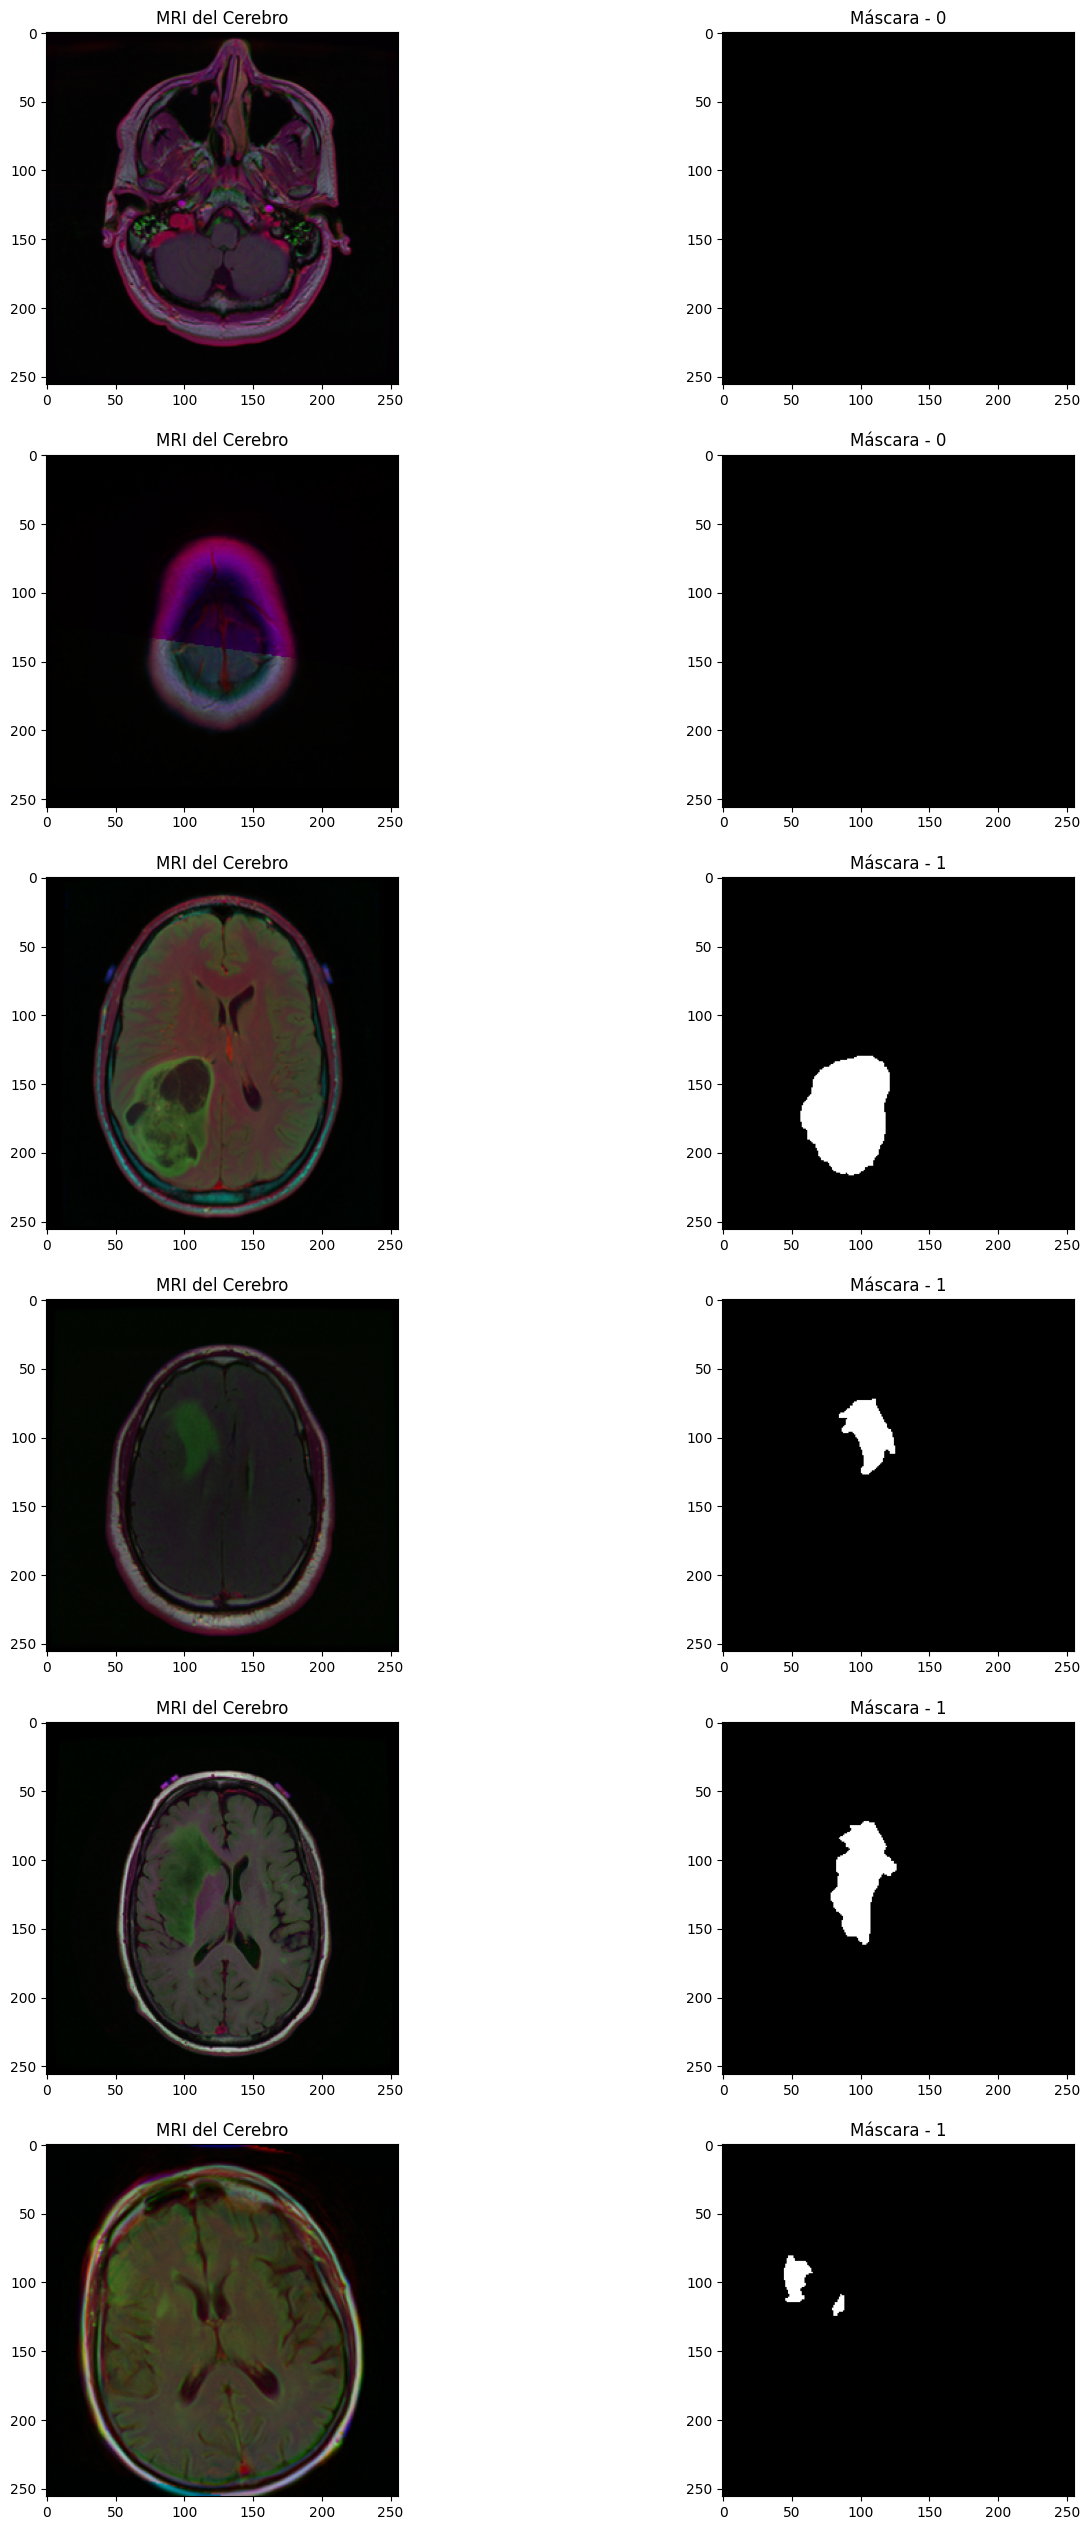

In [14]:
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # Seleccionamos un índice aleatorio
  axs[count][0].title.set_text("MRI del Cerebro") # Configuramos el título
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # Mostramos la MRI
  axs[count][1].title.set_text("Máscara - " + str(brain_df['mask'][i])) # Colocámos el título en la máscara (0 o 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Mostramos la máscara correspondiente
  count += 1

fig.show()